FIT5196 Assessment 3

Student Name: Jiaming Ren

Student ID: 32209436

Date: 25/10/2021

Version: 2.0

Environment: Python 3.8.5 and Anaconda 4.10.3 (64-bit)

Libraries used:

- re (for regular expression, included in Anaconda Python 3.8)
- os (for file operation, included in Anaconda Python 3.8)
- nltk (Natural Language Toolkit, included in Anaconda Python 3.8)
- nltk.collocations (for finding bigrams, included in Anaconda Python 3.8)
- nltk.tokenize (for tokenization, included in Anaconda Python 3.8)
- nltk.corpus (for stop words, not included in Anaconda)
- sklearn (for machine learning, included in Anaconda)

## 1. Load and combine JSON and XML file

### 1.1 read JSON file
- read the JSON using pandas.
- change property_id as int
- change addr_street as str
- round lat and lng

In [1]:
import pandas as pd

# read JSON file
df_file_json = pd.read_json(r'32209436.json')

# change variables type
df_file_json.property_id = df_file_json.property_id.astype('int')
df_file_json.addr_street = df_file_json.addr_street.astype('str')

#round lat and lng
df_file_json.lat = df_file_json.lat.round(6)
df_file_json.lng = df_file_json.lng.round(6)

df_file_json
print("file length: ", len(df_file_json))


1085

### 1.2 read XML file
- read xml file
- define a function that use re to get list
- obtain each array
- make the matrix
- convert to data frame

In [2]:
import re

# read xml file
with open(r'32209436.xml',encoding='utf8') as f:
    str_xml = f.read()

# define a function that use re to get list
def get_list(str_regex, str_data):
    list_v = re.findall(str_regex, str_data, re.DOTALL)
    return list_v

# obtain each array
# a property_id between a <property_id> <\/property_id> tag
list_property_id = get_list('<property_id>(.*?)<\/property_id>',str_xml)

# a lat between a <lat> <\/lat> tag
list_lat = get_list('<lat>(.*?)<\/lat>',str_xml)

# a lng is between a <lng> <\/lng> tag
list_lng = get_list('<lng>(.*?)<\/lng>',str_xml)

# addr_street is between a <addr_street> <\/addr_street>
list_addr_street = get_list('<addr_street>(.*?)<\/addr_street>',str_xml)


df_rows = []
# make the matrix
for i in range(len(list_property_id)):
    # append into data frame row by row
    df_rows.append((list_property_id[i],list_lat[i],list_lng[i],list_addr_street[i]))

# column names
list_cloumn = ['property_id','lat','lng','addr_street']

# convert xml to data frame
df_file_xml = pd.DataFrame(df_rows,columns = list_cloumn)

#change variable type
df_file_xml.property_id = df_file_xml.property_id.astype('int')
df_file_xml.addr_street = df_file_xml.addr_street.astype('str')
df_file_xml.lat = df_file_xml.lat.astype('float').round(6)
df_file_xml.lng = df_file_xml.lng.astype('float').round(6)

df_file_xml

,property_id,lat,lng,addr_street
0,88622,-37.950188,145.033774,20 Rose Street
1,73024,-37.840536,145.288960,16 Hilda Avenue
2,82466,-38.000481,145.243729,9 ROGERS ST
3,73203,-37.856825,145.296850,2/2 Ronald Crescent
4,88892,-37.947742,145.035566,441 Highett Road
...,...,...,...,...
1075,52299,-37.822532,145.002856,136 Coppin Street
1076,24685,-37.680425,144.969000,2 Taronga Court
1077,23392,-37.641246,144.898079,12 Middleton Court
1078,18717,-37.667583,144.925785,33 Rubicon Street


### 1.3 Merge xml and json dataframes
- merge xml df and json df

- drop dupicate values

In [3]:
# merge xml df and json df
df_result  = pd.concat([df_file_xml,df_file_json],ignore_index=True)
# drop dupicate values
df_result.drop_duplicates(subset=['property_id'],keep='first',inplace=True)

df_result

,property_id,lat,lng,addr_street
0,88622,-37.950188,145.033774,20 Rose Street
1,73024,-37.840536,145.288960,16 Hilda Avenue
2,82466,-38.000481,145.243729,9 ROGERS ST
3,73203,-37.856825,145.296850,2/2 Ronald Crescent
4,88892,-37.947742,145.035566,441 Highett Road
...,...,...,...,...
2160,93855,-38.063902,145.124129,2 Toulon Court
2161,39302,-37.700926,145.061286,1 Olympic Street
2162,32272,-37.749836,145.009003,209 Raglan Street
2163,39479,-37.715789,145.035981,11 Niblick Street


## 2. find suburb
- By reading the graphics file, determine whether to contain coordinates to determine

In [4]:
# read graphics file
import geopandas
from shapely.geometry import Point


shp = geopandas.read_file(r'./supplementary_data/vic_suburb_bounadry/VIC_LOCALITY_POLYGON_shp.shp')

def get_sub(lat,lng):
    p = Point(lng, lat)
    # determine whether the coordinates are contained
    contain_result = list(shp.contains(p))
    index_contain = contain_result.index(True)
    # return not available
    if index_contain == -1:
        return 'not available'
    else:
        # return the right value
        return  shp['VIC_LOCA_2'][index_contain]

for index,row in df_result.iterrows():
    suburb = get_sub(row.lat,row.lng)
    df_result.loc[index,'suburb'] = suburb
    
df_result

,property_id,lat,lng,addr_street,suburb
0,88622,-37.950188,145.033774,20 Rose Street,HIGHETT
1,73024,-37.840536,145.288960,16 Hilda Avenue,BORONIA
2,82466,-38.000481,145.243729,9 ROGERS ST,EUMEMMERRING
3,73203,-37.856825,145.296850,2/2 Ronald Crescent,BORONIA
4,88892,-37.947742,145.035566,441 Highett Road,HIGHETT
...,...,...,...,...,...
2160,93855,-38.063902,145.124129,2 Toulon Court,BONBEACH
2161,39302,-37.700926,145.061286,1 Olympic Street,BUNDOORA
2162,32272,-37.749836,145.009003,209 Raglan Street,PRESTON
2163,39479,-37.715789,145.035981,11 Niblick Street,KINGSBURY


## 3. calculate lga
Map to LGA via PDF sub-LGA data

In [5]:
import pdfplumber

# setting up mapping
# read pdf file
pdf_file = pdfplumber.open(r'./supplementary_data/lga_to_suburb.pdf')

pdf_content = '\n'.join([page.extract_text() for page in pdf_file.pages])
list_data_pdf = pdf_content.split('\n')
# store mappings
dict_sub_lga = {}
for item in list_data_pdf:
    # Split the row and get the array STR of LGA and sub
    lga,str_sub = item.split(' : ')
    # Establishing mapping relationship between Suburb and LGA
    for item_sub in eval(str_sub):
        item_sub = item_sub.upper()
        dict_sub_lga[item_sub] = lga
dict_sub_lga
    

{'ABBOTSFORD': 'BANYULE',
 'AIRPORT WEST': 'BANYULE',
 'ALBERT PARK': 'BANYULE',
 'ALPHINGTON': 'BANYULE',
 'ALTONA': 'BRIMBANK',
 'ALTONA NORTH': 'BRIMBANK',
 'ARMADALE': 'BRIMBANK',
 'ASCOT VALE': 'BRIMBANK',
 'ASHBURTON': 'DAREBIN',
 'ASHWOOD': 'DAREBIN',
 'AVONDALE HEIGHTS': 'DAREBIN',
 'BALACLAVA': 'DAREBIN',
 'BALWYN': 'HOBSONS BAY',
 'BALWYN NORTH': 'HOBSONS BAY',
 'BENTLEIGH': 'HOBSONS BAY',
 'BENTLEIGH EAST': 'HOBSONS BAY',
 'BOX HILL': 'HUME',
 'BRAYBROOK': 'HUME',
 'BRIGHTON': 'HUME',
 'BRIGHTON EAST': 'HUME',
 'BRUNSWICK': 'MARIBYRNONG',
 'BRUNSWICK WEST': 'MARIBYRNONG',
 'BULLEEN': 'MARIBYRNONG',
 'BURWOOD': 'MARIBYRNONG',
 'CAMBERWELL': 'MELBOURNE',
 'CANTERBURY': 'MELBOURNE',
 'CARLTON NORTH': 'MELBOURNE',
 'CARNEGIE': 'MELBOURNE',
 'CAULFIELD': 'MELTON',
 'CAULFIELD NORTH': 'MELTON',
 'CAULFIELD SOUTH': 'MELTON',
 'CHADSTONE': 'MELTON',
 'CLIFTON HILL': 'MOONEE VALLEY',
 'COBURG': 'MOONEE VALLEY',
 'COBURG NORTH': 'MOONEE VALLEY',
 'COLLINGWOOD': 'MOONEE VALLEY',
 'DONC

In [6]:
# fill data
for index,row in df_result.iterrows():
    lga = dict_sub_lga.get(row.suburb,'not available')
    df_result.loc[index,'Lga'] = lga
    
df_result

,property_id,lat,lng,addr_street,suburb,Lga
0,88622,-37.950188,145.033774,20 Rose Street,HIGHETT,GREATER DANDENONG
1,73024,-37.840536,145.288960,16 Hilda Avenue,BORONIA,TOWONG
2,82466,-38.000481,145.243729,9 ROGERS ST,EUMEMMERRING,PYRENEES
3,73203,-37.856825,145.296850,2/2 Ronald Crescent,BORONIA,TOWONG
4,88892,-37.947742,145.035566,441 Highett Road,HIGHETT,GREATER DANDENONG
...,...,...,...,...,...,...
2160,93855,-38.063902,145.124129,2 Toulon Court,BONBEACH,QUEENSCLIFFE
2161,39302,-37.700926,145.061286,1 Olympic Street,BUNDOORA,WODONGA
2162,32272,-37.749836,145.009003,209 Raglan Street,PRESTON,BOROONDARA
2163,39479,-37.715789,145.035981,11 Niblick Street,KINGSBURY,ALPINE


## 4. closest_train_station_id calculation

In [7]:
# Definition computes the distance between two coordinate points

from math import radians, cos, sin, asin, sqrt


def cal_haversine(lat_1,lng_1,lat_2,lng_2):
    lat_1,lng_1,lat_2,lng_2 = map(radians,[lat_1,lng_1,lat_2,lng_2])
    dlon = lng_2-lng_1
    dlat = lat_2-lat_1
    a = sin(dlat/2)**2 + cos(lat_1) * cos(lat_2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6378 
    return c * r
print('ok')

ok


In [8]:
# Reading site information
df_plubic_stops = pd.read_csv(r'./supplementary_data/Vic_GTFS_data/metropolitan/stops.txt')

# Calculates the nearest site
def cal_closest_station(lat,lng):
    # set default is None
    cal_stop_id,cal_distance = None,None
    for index,row in df_plubic_stops.iterrows():
        stop_lat,stop_lon = row.stop_lat,row.stop_lon
        temp_distance = cal_haversine(lat,lng,stop_lat,stop_lon)
        # Assign if the site is None or if the new distance is less than the calculated distance
        if cal_distance == None or temp_distance<cal_distance:
            cal_stop_id = row.stop_id
            cal_distance = temp_distance
    return cal_stop_id,cal_distance


In [9]:
# fill data
for index,row in df_result.iterrows():
    lat = row.lat
    lng = row.lng
    station_id,station_distance = cal_closest_station(lat,lng)
    df_result.loc[index,'closest_train_station_id'] = int(station_id)
    df_result.loc[index,'distance_to_closest_train_station'] = station_distance
    

df_result

,property_id,lat,lng,addr_street,suburb,Lga,closest_train_station_id,distance_to_closest_train_station
0,88622,-37.950188,145.033774,20 Rose Street,HIGHETT,GREATER DANDENONG,19872.0,0.737416
1,73024,-37.840536,145.288960,16 Hilda Avenue,BORONIA,TOWONG,19870.0,1.835397
2,82466,-38.000481,145.243729,9 ROGERS ST,EUMEMMERRING,PYRENEES,19885.0,2.985075
3,73203,-37.856825,145.296850,2/2 Ronald Crescent,BORONIA,TOWONG,19869.0,1.167534
4,88892,-37.947742,145.035566,441 Highett Road,HIGHETT,GREATER DANDENONG,19872.0,0.558727
...,...,...,...,...,...,...,...,...
2160,93855,-38.063902,145.124129,2 Toulon Court,BONBEACH,QUEENSCLIFFE,19859.0,0.404184
2161,39302,-37.700926,145.061286,1 Olympic Street,BUNDOORA,WODONGA,19984.0,2.275142
2162,32272,-37.749836,145.009003,209 Raglan Street,PRESTON,BOROONDARA,20013.0,0.912617
2163,39479,-37.715789,145.035981,11 Niblick Street,KINGSBURY,ALPINE,20009.0,2.490587


## 5. calculate travel_min_to_MC and direct_journey_flag

In [10]:
# Obtain the service ID of the working day
df_data_calendar = pd.read_csv(r"./supplementary_data/Vic_GTFS_data/metropolitan/calendar.txt")
list_workday_service = []
for index,row in df_data_calendar.iterrows():
    if str(row.monday) == '1' or str(row.tuesday) == '1' or str(row.wednesday) == '1' or str(row.thursday) == '1' or str(row.friday) == '1':
        list_workday_service.append(row.service_id)

# drop duplicates
list_workday_service = list(set(list_workday_service))

list_workday_service

['T5+tg_1',
 'T6',
 'T5+ao',
 'T5+tg',
 'T0+a6',
 'T5+ph',
 'T5_1',
 'T0+a5',
 'T5',
 'T5+ta',
 'T5+ph_1',
 'T6_1',
 'T0']

In [11]:
# Find the trip ID of the work day
# Reading trips data
df_data_trip = pd.read_csv(r"./supplementary_data/Vic_GTFS_data/metropolitan/trips.txt")

list_workday_trips = []
for index,row in df_data_trip.iterrows():
    if row.service_id in  list_workday_service:
        list_workday_trips.append(row.trip_id)
    
        

list_workday_trips = list(set(list_workday_trips))
list_workday_trips

['17196140.T6.2-BDM-D-mjp-1.17.R',
 '17183556.T5.2-LIL-C-mjp-1.9.H',
 '17188036.T5.2-SPT-C-mjp-1.2.R',
 '17196797.T6.2-WMN-D-mjp-1.11.R',
 '17183701.T5.2-BEL-C-mjp-1.16.H',
 '17189953.T5.2-SDM-C-mjp-1.4.R',
 '17197211.T6.2-SYM-D-mjp-1.7.H',
 '17187221.T5.2-WMN-C-mjp-1.4.R',
 '17194457.T6.2-FKN-D-mjp-1.6.H',
 '17198438.T5.2-SYM-E-mjp-1.15.R',
 '17189645.T5.2-SDM-C-mjp-1.4.R',
 '17189658.T5.2-SDM-C-mjp-1.1.H',
 '17189455.T6.2-SYM-B-mjp-1.23.R',
 '17069540.T0.2-FKN-F-mjp-1.8.H',
 '17068379.T0.2-ALM-F-mjp-1.2.H',
 '17194661.T6.2-FKN-D-mjp-1.20.R',
 '17192106.T5.2-ALM-E-mjp-1.1.H',
 '17196607.T6.2-WBE-D-mjp-1.10.H',
 '17194722.T5.2-FKN-E-mjp-1.24.R',
 '17197091.T6.2-WBE-D-mjp-1.24.R',
 '17186839.T5.2-SYM-C-mjp-1.13.R',
 '17198476.T5.2-SYM-E-mjp-1.3.H',
 '17071397.T0.2-WBE-F-mjp-1.17.R',
 '17183141.T6.2-BEL-B-mjp-1.12.H',
 '17195524.T6.2-UFD-D-mjp-1.4.H',
 '17186984.T6.2-SYM-B-mjp-1.19.H',
 '17195954.T6.2-UFD-D-mjp-1.7.H',
 '17071434.T0.2-WBE-F-mjp-1.15.R',
 '17194704.T5.2-FKN-E-mjp-1.26.R',

In [12]:
# find stop_id
mc_stop_id = 0
for index,row in df_plubic_stops.iterrows():
    if row.stop_name.startswith('Melbourne Central'):
        mc_stop_id = row.stop_id
        break

mc_stop_id


19842

In [13]:
df_data_stop_times = pd.read_csv(r"./supplementary_data/Vic_GTFS_data/metropolitan/stop_times.txt")
# Find trips that can reach MC and run on weekdays
df_filter_stop_time =  df_data_stop_times[df_data_stop_times.trip_id.isin(list_workday_trips)]
# Find data that is available on weekdays and can reach the MC site
df_filter_stop_time = df_filter_stop_time[df_data_stop_times.stop_id == mc_stop_id]

# Filter out site data that meets the requirements
df_validated_stop_time = df_data_stop_times[df_data_stop_times.trip_id.isin(df_filter_stop_time.trip_id.unique())]

df_validated_stop_time

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
903,17183020.T6.2-ALM-B-mjp-1.2.H,05:38:00,05:38:00,19847,1,NaN,0,0,0.000000
904,17183020.T6.2-ALM-B-mjp-1.2.H,05:39:00,05:39:00,19848,2,NaN,0,0,723.017818
905,17183020.T6.2-ALM-B-mjp-1.2.H,05:41:00,05:41:00,19849,3,NaN,0,0,1951.735072
906,17183020.T6.2-ALM-B-mjp-1.2.H,05:43:00,05:43:00,19850,4,NaN,0,0,2899.073349
907,17183020.T6.2-ALM-B-mjp-1.2.H,05:45:00,05:45:00,19851,5,NaN,0,0,3927.090952
...,...,...,...,...,...,...,...,...,...
358185,17070400.T0.2-UFD-F-mjp-1.9.R,22:54:00,22:54:00,22180,15,NaN,0,0,18659.883441
358186,17070400.T0.2-UFD-F-mjp-1.9.R,22:58:00,23:04:00,19854,16,NaN,0,0,20195.638187
358187,17070400.T0.2-UFD-F-mjp-1.9.R,23:06:00,23:06:00,19843,17,NaN,0,0,21513.362115
358188,17070400.T0.2-UFD-F-mjp-1.9.R,23:08:00,23:08:00,19842,18,NaN,0,0,22660.953896


In [14]:
df_stop_time_gp = df_validated_stop_time.groupby('trip_id')
import datetime


# Calculation time difference
def cal_diff_time(departure_time,arrival_time):
    t1 = datetime.datetime.strptime(departure_time, '%H:%M:%S')
    t2 = datetime.datetime.strptime(arrival_time, '%H:%M:%S')
    return (t2 - t1).seconds / 60

list_stop_to_mc_time = []
for trip_id, df_group in df_stop_time_gp:
    mc_row = df_group[df_group.stop_id== mc_stop_id]
    # MC's arrival time
    mc_arrival_time = mc_row.arrival_time.values[0]
    # MC's site sequence
    mc_stop_sequence = mc_row.stop_sequence.values[0]
    for index,row in df_group.iterrows():
        # Sequence greater than MC site ignored
        if int(row.stop_sequence) > mc_stop_sequence:
            continue
        # Ignore departure time greater than 9 o 'clock
        if row.departure_time > '09:00:00':
            continue
        # The departure time less than 7 o 'clock is ignored
        if row.departure_time < '07:00:00':
            continue
        
        time_to_mc = cal_diff_time(row.departure_time,mc_arrival_time)
        dict_temp = {
            'stop_id':row.stop_id,
            'to_mc_time':time_to_mc
        }
        list_stop_to_mc_time.append(dict_temp)
        
        
    
list_stop_to_mc_time



[{'stop_id': 19854, 'to_mc_time': 7.0},
 {'stop_id': 22180, 'to_mc_time': 4.0},
 {'stop_id': 19841, 'to_mc_time': 2.0},
 {'stop_id': 19842, 'to_mc_time': 0.0},
 {'stop_id': 19976, 'to_mc_time': 18.0},
 {'stop_id': 19977, 'to_mc_time': 16.0},
 {'stop_id': 19978, 'to_mc_time': 15.0},
 {'stop_id': 19979, 'to_mc_time': 13.0},
 {'stop_id': 19854, 'to_mc_time': 7.0},
 {'stop_id': 22180, 'to_mc_time': 4.0},
 {'stop_id': 19841, 'to_mc_time': 2.0},
 {'stop_id': 19842, 'to_mc_time': 0.0},
 {'stop_id': 20016, 'to_mc_time': 27.0},
 {'stop_id': 20017, 'to_mc_time': 25.0},
 {'stop_id': 20019, 'to_mc_time': 24.0},
 {'stop_id': 19974, 'to_mc_time': 20.0},
 {'stop_id': 19975, 'to_mc_time': 18.0},
 {'stop_id': 19976, 'to_mc_time': 17.0},
 {'stop_id': 19977, 'to_mc_time': 15.0},
 {'stop_id': 19978, 'to_mc_time': 14.0},
 {'stop_id': 19979, 'to_mc_time': 12.0},
 {'stop_id': 19854, 'to_mc_time': 7.0},
 {'stop_id': 22180, 'to_mc_time': 4.0},
 {'stop_id': 19841, 'to_mc_time': 2.0},
 {'stop_id': 19842, 'to_mc_

In [15]:
def cal_avg_time(stop_id):
    # Gets all The Times that the site can reach the MC
    filter_list = list(filter(lambda item:item.get('stop_id') == stop_id,list_stop_to_mc_time))
    if len(filter_list) == 0:
        return 'not available',0
    
    sum_time = sum(list(map(lambda item:item.get('to_mc_time'),filter_list)))
    # calculate the AVG
    avg_time = round(sum_time/len(filter_list),0)
    return avg_time,1

for index,row in df_result.iterrows():
    stop_id = row.closest_train_station_id
    if stop_id == mc_stop_id:
        df_result.loc[index,'travel_min_to_MC'] = 0
        df_result.loc[index,'direct_journey_flag'] = 1
    else:
        travel_min_to_MC,direct_journey_flag =  cal_avg_time(stop_id)
        df_result.loc[index,'travel_min_to_MC'] = travel_min_to_MC
        df_result.loc[index,'direct_journey_flag'] = direct_journey_flag
        
        
df_result   
    

,property_id,lat,lng,addr_street,suburb,Lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag
0,88622,-37.950188,145.033774,20 Rose Street,HIGHETT,GREATER DANDENONG,19872.0,0.737416,37.0,1.0
1,73024,-37.840536,145.288960,16 Hilda Avenue,BORONIA,TOWONG,19870.0,1.835397,41.0,1.0
2,82466,-38.000481,145.243729,9 ROGERS ST,EUMEMMERRING,PYRENEES,19885.0,2.985075,50.0,1.0
3,73203,-37.856825,145.296850,2/2 Ronald Crescent,BORONIA,TOWONG,19869.0,1.167534,44.0,1.0
4,88892,-37.947742,145.035566,441 Highett Road,HIGHETT,GREATER DANDENONG,19872.0,0.558727,37.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2160,93855,-38.063902,145.124129,2 Toulon Court,BONBEACH,QUEENSCLIFFE,19859.0,0.404184,56.0,1.0
2161,39302,-37.700926,145.061286,1 Olympic Street,BUNDOORA,WODONGA,19984.0,2.275142,42.0,1.0
2162,32272,-37.749836,145.009003,209 Raglan Street,PRESTON,BOROONDARA,20013.0,0.912617,33.0,1.0
2163,39479,-37.715789,145.035981,11 Niblick Street,KINGSBURY,ALPINE,20009.0,2.490587,41.0,1.0


## 6. get 30 sep,last 14/30/60 case 

In [16]:
list_lga = list(df_result.Lga.unique())

# Store the number of lga cases
dict_lga_cases = {}

dict_lga_cases['not available'] = {
    'sep_30':'not available',
    'last_14':'not available',
    'last_30':'not available',
    'last_60':'not available'
    
}
list_lga


['GREATER DANDENONG',
 'TOWONG',
 'PYRENEES',
 'CENTRAL GOLDFIELDS',
 'DAREBIN',
 'SWAN HILL',
 'CARDINIA',
 'GLEN EIRA',
 'FRANKSTON',
 'WODONGA',
 'MONASH',
 'GREATER BENDIGO',
 'MOONEE VALLEY',
 'YARRA RANGES',
 'PORT PHILLIP',
 'BASS COAST',
 'SOUTH GIPPSLAND',
 'ALPINE',
 'WANGARATTA',
 'BAW BAW',
 'WEST WIMMERA',
 'BULOKE',
 'BANYULE',
 'EAST GIPPSLAND',
 'MELTON',
 'BOROONDARA',
 'NILLUMBIK',
 'MACEDON RANGES',
 'HUME',
 'SOUTHERN GRAMPIANS',
 'GREATER GEELONG',
 'MOIRA',
 'HOBSONS BAY',
 'KNOX',
 'MORELAND',
 'WHITTLESEA',
 'LATROBE',
 'BALLARAT',
 'WYNDHAM',
 'CAMPASPE',
 'QUEENSCLIFFE',
 'STONNINGTON',
 'MURRINDINDI',
 'STRATHBOGIE',
 'BRIMBANK',
 'HEPBURN',
 'KINGSTON',
 'WELLINGTON',
 'MANNINGHAM',
 'MELBOURNE',
 'MARIBYRNONG',
 'INDIGO',
 'HINDMARSH',
 'MOYNE',
 'SURF COAST',
 'MANSFIELD',
 'GREATER SHEPPARTON',
 'MITCHELL',
 'MAROONDAH',
 'MOORABOOL',
 'LODDON',
 'HORSHAM',
 'BENALLA',
 'ARARAT',
 'CASEY',
 'WHITEHORSE',
 'YARRA',
 'YARRIAMBIACK',
 'COLAC-OTWAY',
 'MOUNT 

In [18]:
web_url = r'https://covidlive.com.au/vic/'
for lga in list_lga:
    if lga in dict_lga_cases:
        continue
                
    url_lga = lga.strip().lower().replace(' ','-')
    full_url = web_url + url_lga
    print(full_url)
    df_data_cases = pd.read_html(full_url)[1]
    index_sep_30 = 0
    for index,row in df_data_cases.iterrows():
        if row.DATE == '30 Sep':
            index_sep_30 = index
            break
            
    sep_30_cases = df_data_cases.loc[index_sep_30].CASES - df_data_cases.loc[index_sep_30+1].CASES
    last_14_cases = round(float((df_data_cases.loc[index_sep_30+1].CASES - df_data_cases.loc[index_sep_30+14].CASES)/14),0)
    last_30_cases = round(float((df_data_cases.loc[index_sep_30+1].CASES - df_data_cases.loc[index_sep_30+30].CASES)/30),0)
    last_60_cases = round(float((df_data_cases.loc[index_sep_30+1].CASES - df_data_cases.loc[index_sep_30+60].CASES)/60),0)
    
    
    dict_lga_cases[lga] = {
        'sep_30':sep_30_cases,
        'last_14':last_14_cases,
        'last_30':last_30_cases,
        'last_60':last_60_cases

    }

dict_lga_cases
# dic_covidlive_df = pd.read_html('https://covidlive.com.au/vic/alpine')[1]

# dic_covidlive_df

{'not available': {'sep_30': 'not available',
  'last_14': 'not available',
  'last_30': 'not available',
  'last_60': 'not available'},
 'GREATER DANDENONG': {'sep_30': 36,
  'last_14': 9.0,
  'last_30': 6.0,
  'last_60': 3.0},
 'TOWONG': {'sep_30': 0, 'last_14': 0.0, 'last_30': 0.0, 'last_60': 0.0},
 'PYRENEES': {'sep_30': 0, 'last_14': 0.0, 'last_30': 0.0, 'last_60': 0.0},
 'CENTRAL GOLDFIELDS': {'sep_30': 0,
  'last_14': 0.0,
  'last_30': 0.0,
  'last_60': 0.0},
 'DAREBIN': {'sep_30': 41, 'last_14': 21.0, 'last_30': 15.0, 'last_60': 8.0},
 'SWAN HILL': {'sep_30': 1, 'last_14': 0.0, 'last_30': 0.0, 'last_60': 0.0},
 'CARDINIA': {'sep_30': 25, 'last_14': 10.0, 'last_30': 5.0, 'last_60': 3.0},
 'GLEN EIRA': {'sep_30': 15, 'last_14': 4.0, 'last_30': 2.0, 'last_60': 1.0},
 'FRANKSTON': {'sep_30': 3, 'last_14': 3.0, 'last_30': 2.0, 'last_60': 1.0},
 'WODONGA': {'sep_30': 3, 'last_14': 0.0, 'last_30': 0.0, 'last_60': 0.0},
 'MONASH': {'sep_30': 16, 'last_14': 4.0, 'last_30': 3.0, 'last_60

In [19]:
for index,row in df_result.iterrows():
    lga = row.Lga
    data_lga_cases = dict_lga_cases.get(lga)
    df_result.loc[index,'30_sep_cases'] = data_lga_cases.get('sep_30')
    df_result.loc[index,'last_14_days_cases'] = data_lga_cases.get('last_14')
    df_result.loc[index,'last_30_days_cases'] = data_lga_cases.get('last_30')
    df_result.loc[index,'last_60_days_cases'] = data_lga_cases.get('last_60')

In [20]:
df_result.to_csv('32209436_A3_solution.csv',index=False)

## task2

### 1.Data Processing

In [21]:
# The data of cases of COVID-19 are mainly lGA data, and not available data are filtered out

dict_lga_cases

data_shap_cases = []
# Filter out not available data
for lga,item_cases in dict_lga_cases.items():
    if lga == 'not available':
        continue
    data_shap_cases.append(item_cases)
# To a dataframe
df_cases = pd.DataFrame(data_shap_cases)

df_cases

,sep_30,last_14,last_30,last_60
0,36,9.0,6.0,3.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,0.0
4,41,21.0,15.0,8.0
...,...,...,...,...
65,12,1.0,1.0,1.0
66,15,7.0,5.0,3.0
67,0,0.0,0.0,0.0
68,1,0.0,0.0,0.0


### 2.Viewing data distribution

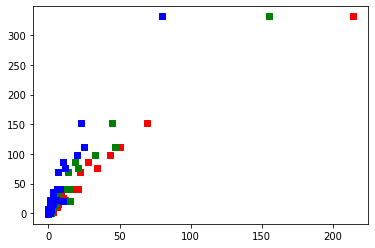

In [22]:
import matplotlib.pyplot as plt 

def myscatter(df_scatter_data):
    plt.scatter(df_scatter_data[['last_14']],df_scatter_data['sep_30'],c = 'r',marker = 's',label='last_14')  
    plt.scatter(df_scatter_data[['last_30']],df_scatter_data['sep_30'],c = 'g',marker = 's',label='last_30')  
    plt.scatter(df_scatter_data[['last_60']],df_scatter_data['sep_30'],c = 'b',marker = 's',label='last_60')  

myscatter(df_cases)
# There is a certain linear relationship, but each value deviates far,，

## 3.standardization processing

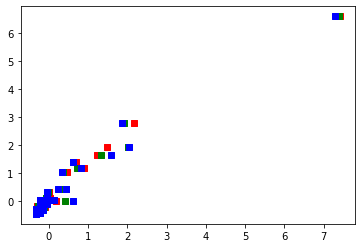

In [23]:
from sklearn import preprocessing

df_standardization = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_cases))

re_columns={0:'sep_30',1:'last_14',2:'last_30',3:'last_60'}
df_standardization.rename(columns=re_columns, inplace = True)
df_standardization
myscatter(df_standardization)


# The data is more concentrated, but the deviation is still large


## 4. minmax process

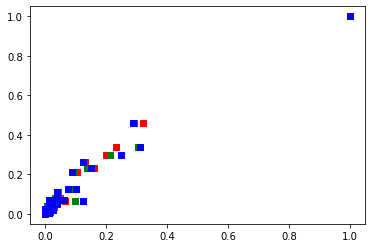

In [24]:
from sklearn import preprocessing

df_min_max = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=[0,1]).fit_transform(df_cases))

re_columns={0:'sep_30',1:'last_14',2:'last_30',3:'last_60'}
df_min_max.rename(columns=re_columns, inplace = True)
myscatter(df_min_max)


# Similar to standardization result


## 5. log

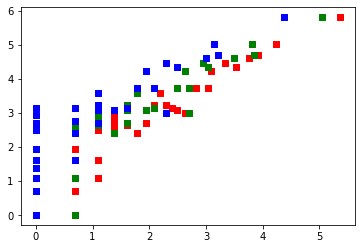

In [25]:
import math
def _log(value):
    if value>0:
        return math.log(value)
    if value ==0:
        return 0
    return -1*math.log(-1*value)

df_log = pd.DataFrame()
keys = ['sep_30','last_14','last_30','last_60']
for k in keys:
    df_log[k] = df_cases[k].apply(_log)

myscatter(df_log)
# The peaks are handled effectively, but still skewed to the left

## 6.power processing

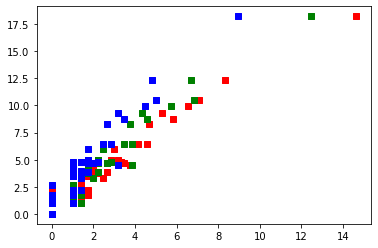

In [26]:
import math

def _power(value):
    if value >0:
        return math.pow(value,0.5)
    if value== 0 :
        return 0
    return math.pow(-1*value,0.5)
   

df_power = pd.DataFrame()
for k in keys:
    df_power[k] = df_cases[k].apply(_power)

myscatter(df_power)
# The data is more evenly distributed

## 7. box cox processing

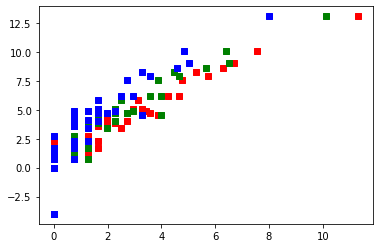

In [27]:
from scipy.special import boxcox1p

lam = 0.25
df_box_cox = pd.DataFrame()
for k in keys:
    df_box_cox[k] = boxcox1p(df_cases[k],lam)
df_box_cox
myscatter(df_box_cox)

# The minimum is even more deviated


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

#implement the training function 
def _train(df_trans_data,process):
    x_train, x_test, y_train, y_test = model_selection.train_test_split(df_trans_data[['last_14','last_30','last_60']], df_trans_data['sep_30'], test_size=0.2,
                                                                                random_state=3)
    #linear regression model
    lr_model = LinearRegression()
    #fit
    lr_model.fit(x_train, y_train)
    #trans the score
    trans_score = lr_model.score(x_train, y_train)
    test_score = lr_model.score(x_test, y_test)
    
    #print out result
    print('after {} process'.format(process))
    print('trans:{0}\ntest:{1}'.format(trans_score,test_score))
    print('-'*30)

In [29]:
#train data sets
_train(df_cases,'no ')
_train(df_standardization,'standardization')
_train(df_min_max,'min_max')
_train(df_log,'log')
_train(df_power,'power')
_train(df_box_cox,'box_cox')


after no  process
trans:0.9638380215995771
test:0.8305746165173222
------------------------------
after standardization process
trans:0.9638380215995771
test:0.8305746165173216
------------------------------
after min_max process
trans:0.9638380215995771
test:0.8305746165173211
------------------------------
after log process
trans:0.8903513366462497
test:0.9453283802779705
------------------------------
after power process
trans:0.9524866384833456
test:0.9162534161399766
------------------------------
after box_cox process
trans:0.8708984894053085
test:0.966714296274922
------------------------------


In conclusion, there is a linear relationship between SEP 30 and last 14, last 30 and last 60, but the data is relatively discrete and the fitting degree is not high. After 0.5 power processing,data distribution is relatively average, and the linear model established on this basis has a high score